In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

def Delete_empty_rows(data):
    #Remove Empty Values
    temp=(data.T != 0).any()
    data = data[temp]
    return data

In [151]:
highPerturbation = pd.read_csv('./highp_finalresults.csv')#, index_col=0)
lowPerturbation = pd.read_csv('./lowp_finalresults.csv')#, index_col=0)

## Primero se realiza un análisis individual de cada sistema para extraer la información

In [152]:
columns=['ident','emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas',\
        'num_planets','mass_planets','mass_efficiency']

#High Perturbation System Analysis
Num_systh = highPerturbation['ident'].values[-1]+1
highp_vars = pd.DataFrame(columns=columns)
for i in range(Num_systh):
    Current_syst = highPerturbation[highPerturbation['ident'].values==i]
    planets=np.shape(Current_syst)[0]
    
    if(planets>0):
        initials=Current_syst[columns[:12]].values[0]
        planets=np.shape(Current_syst)[0]
        row_vals=np.append(initials,planets)

        planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
        row_vals=np.append(row_vals,planet_mass)

        eff=planet_mass/Current_syst['emed'].values[0]
        row_vals=np.append(row_vals,eff)
    else:
        row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    highp_vars.loc[i]=row_vals
    
    
#Low Perturbation System Analysis
Num_systl = lowPerturbation['ident'].values[-1]+1
lowp_vars = pd.DataFrame(columns=columns)
for i in range(Num_systl):
    Current_syst = lowPerturbation[lowPerturbation['ident'].values==i]
    planets=np.shape(Current_syst)[0]
    
    if(planets>0):
        initials=Current_syst[columns[:12]].values[0]
        planets=np.shape(Current_syst)[0]
        row_vals=np.append(initials,planets)

        planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
        row_vals=np.append(row_vals,planet_mass)

        eff=planet_mass/Current_syst['emed'].values[0]
        row_vals=np.append(row_vals,eff)
    else:
        row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    lowp_vars.loc[i]=row_vals

In [153]:
lowp=pd.DataFrame(lowp_vars)
highp=pd.DataFrame(highp_vars)

lowp=Delete_empty_rows(lowp)
highp=Delete_empty_rows(highp)

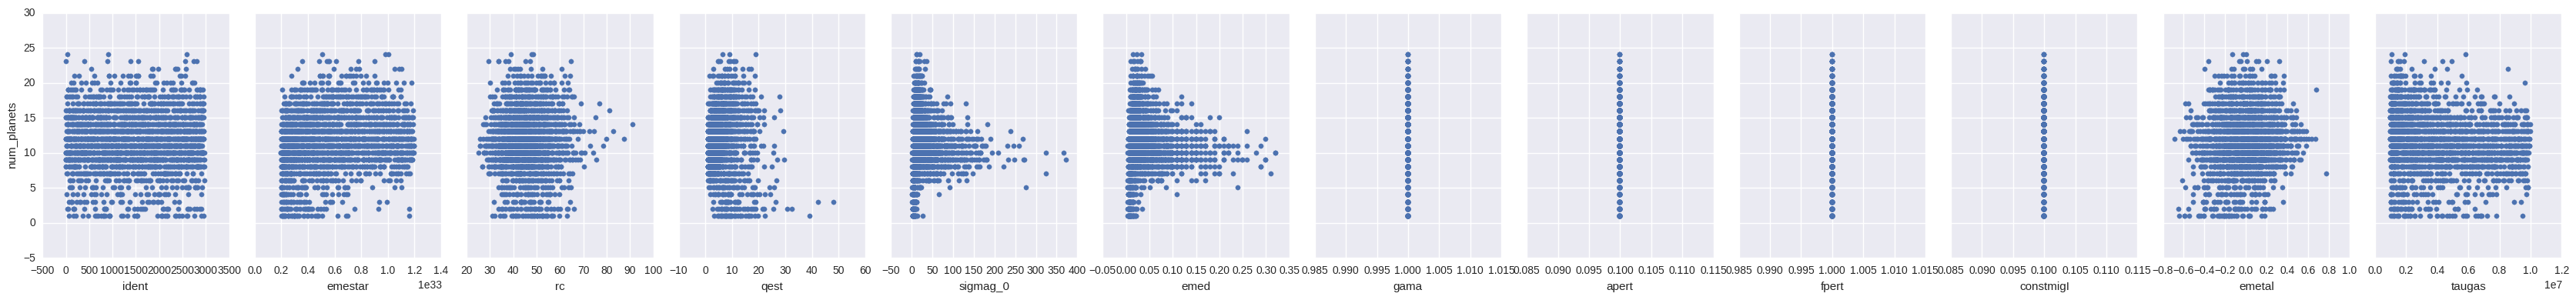

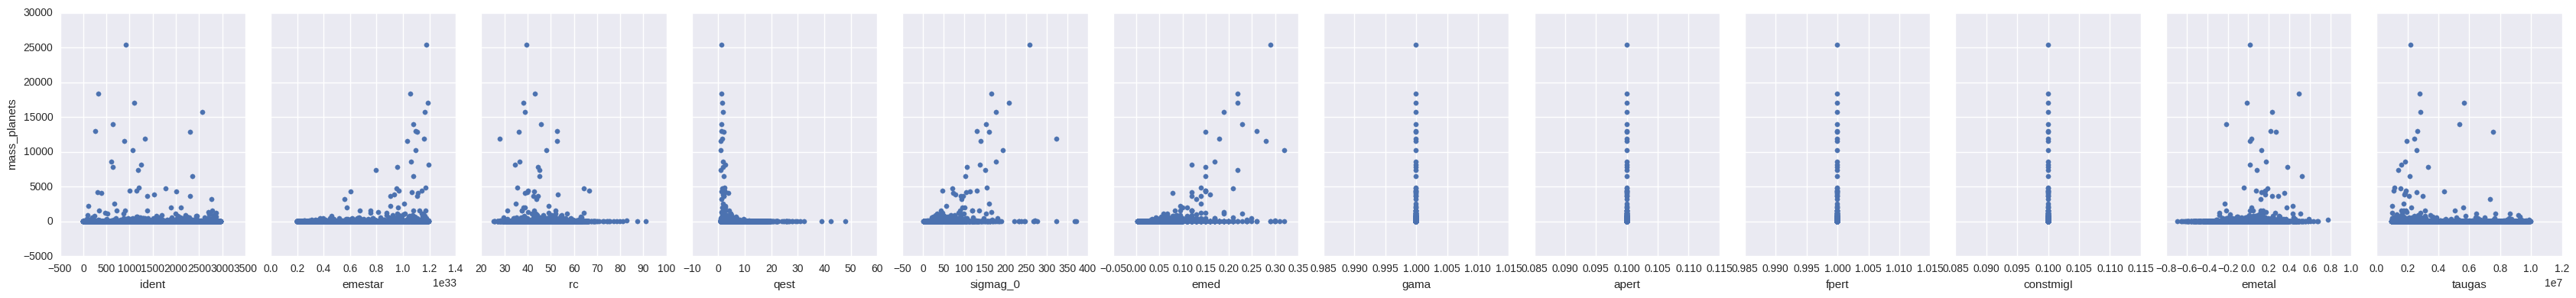

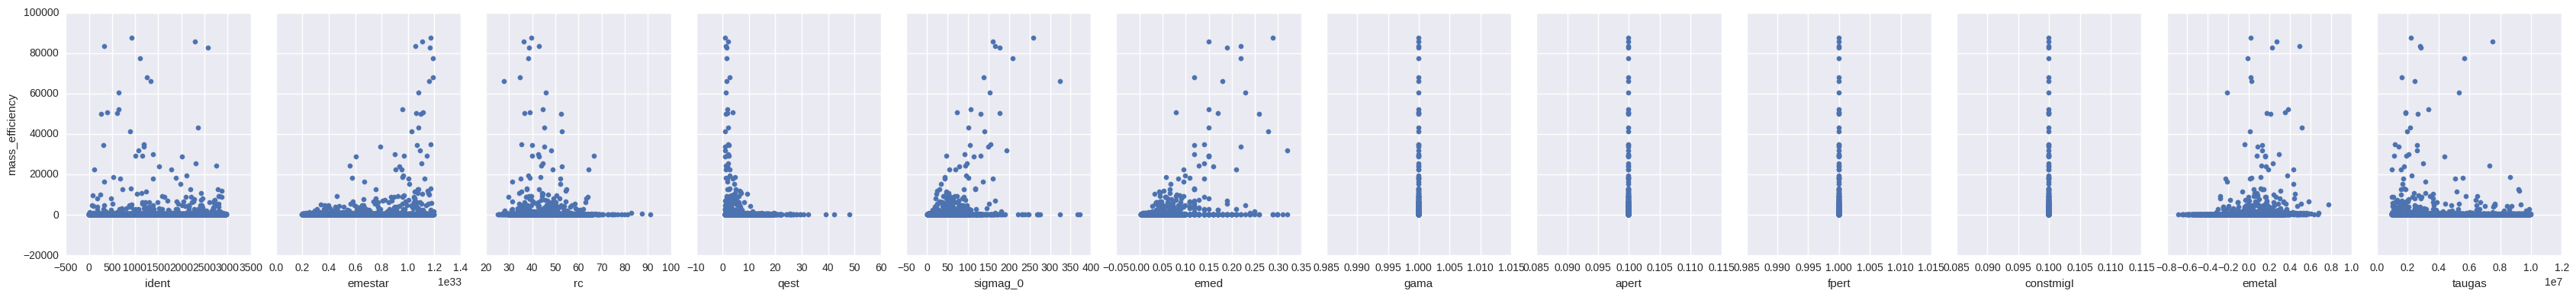

In [154]:
data = ['ident','emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas']
target = ['num_planets','mass_planets','mass_efficiency']

X=lowp[data]
Y=lowp[target]

for i in target:
    sns.pairplot(lowp, x_vars=data, y_vars=i, size=4, aspect=0.7)

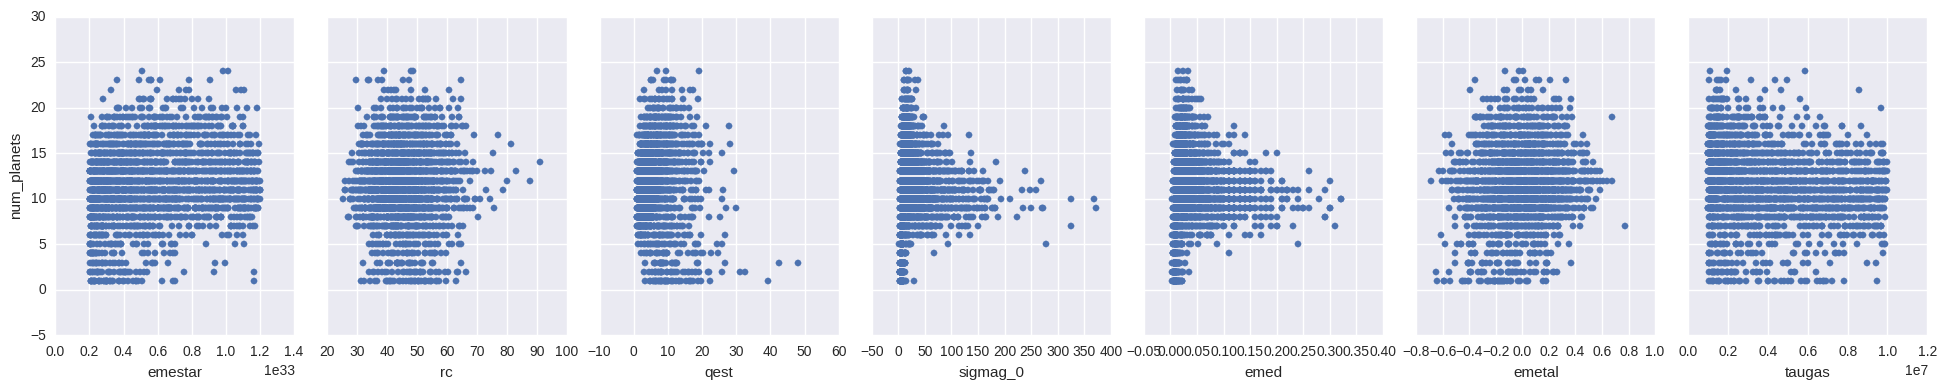

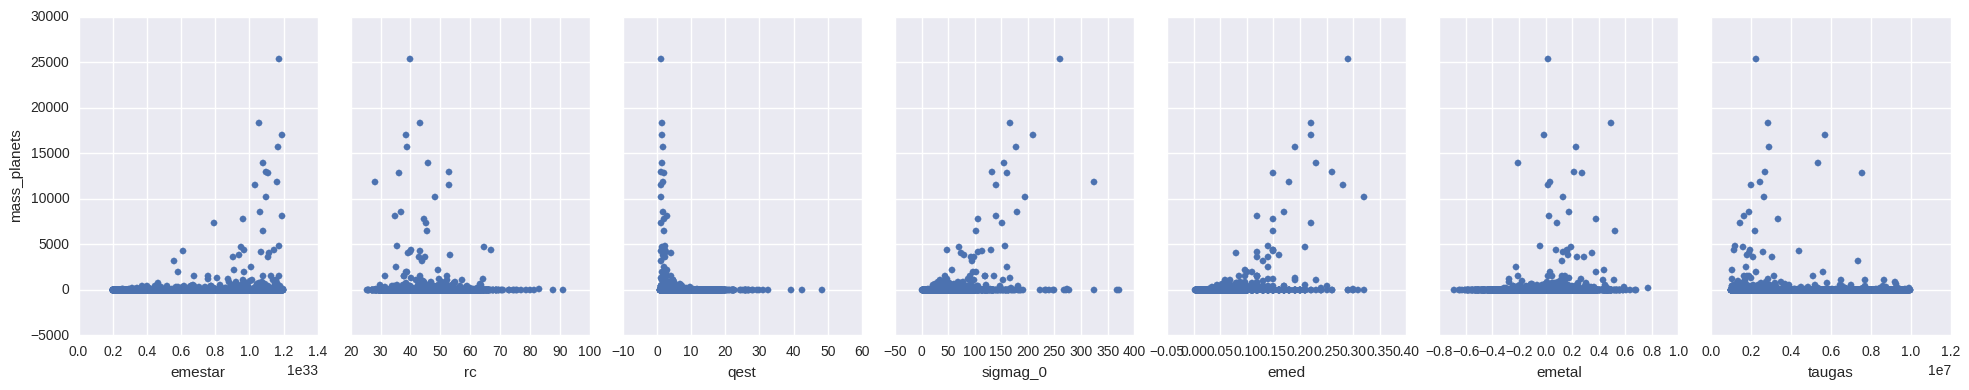

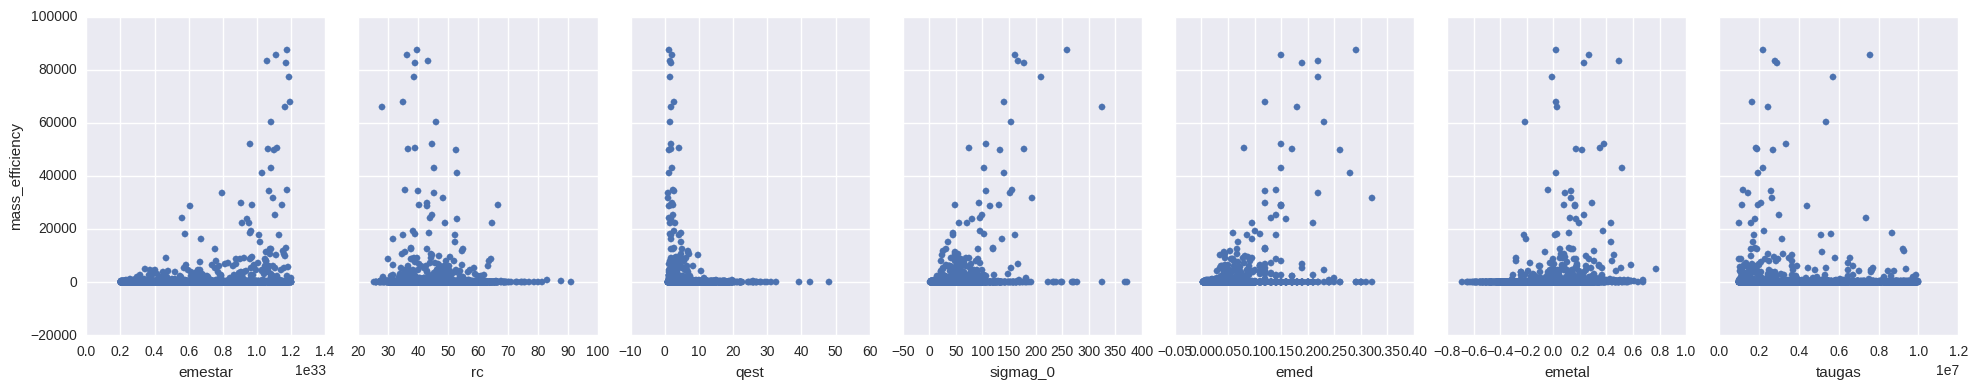

In [155]:
not_relevance=['ident','gama','apert','fpert','constmigI']

for i in not_relevance:
    data.remove(i)

X=lowp[data]
Y=lowp[target]

for i in target:
    sns.pairplot(lowp, x_vars=data, y_vars=i, size=4, aspect=0.7)

In [161]:
from sklearn.ensemble import RandomForestClassifier

scaler = preprocessing.StandardScaler().fit(X)
Ym=Y.mean()
Y=Y-Ym

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)   

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X,Y)

ValueError: Unknown label type: 'unknown'